## Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load the data from csv file

In [2]:
data = pd.read_csv('cell_samples.csv')

In [3]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data.shape

(699, 11)

In [5]:
data.size # in bytes

7689

In [6]:
# tells the variable in each column
data.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [7]:
# count of values in aprticular row
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

---> The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

## Distribution of the classes

In [8]:
malignant_data = data[data['Class']==4][0:200]
benign_data = data[data['Class']==2][0:200]

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

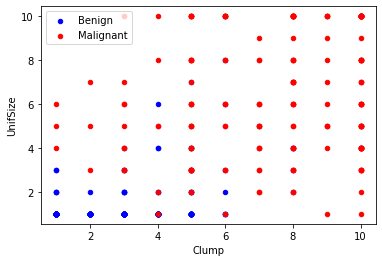

In [9]:
axes = benign_data.plot(kind='scatter', x='Clump', y='UnifSize', color ='blue', label='Benign')
malignant_data.plot(kind='scatter', x='Clump', y='UnifSize', color ='red', label='Malignant', ax =axes)

## identifying the unwanted data

In [10]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

---> BareNuc has a object datatype

In [11]:
data['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [12]:
# Convert the bareNuc column to numeric datatype
data = data[pd.to_numeric(data['BareNuc'], errors='coerce').notnull()]

In [13]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [14]:
# converting to integer
data['BareNuc'] = data['BareNuc'].astype('int')

In [15]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [33]:
data.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

## Remove unwanted columns


In [16]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [17]:
# Feature extraction
feature_data =data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [19]:
# Converting into numpy  N dimentional array
X = np.asarray(feature_data) # X denotes independent variables

In [26]:
print(X[0:5])

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]]


In [23]:
y = np.asarray(data['Class'])

In [25]:
print(y[0:10])

[2 2 2 2 2 4 2 2 2 2]


## Divide the data as test/test Dataset

In [29]:
# import package
from sklearn.model_selection import train_test_split


In [30]:
X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=0.2, random_state=4)

In [38]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((546, 9), (546,), (137, 9), (137,))

## Modelling(SVm with scikit-learn)

In [39]:
# Import libraries
from sklearn import svm



In [55]:
# SVC = support vector machines
classifier=svm.SVC(kernel = 'linear', gamma='auto', C=2)# C denotes the penaltiy
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [56]:
y_predict = classifier.predict(X_test)


## Evaluation


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



##### ---> model performed well with an accuracy of 96%